In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [16]:
df=df.drop(['Unnamed: 0'],axis=1)

Unnamed: 0 column is only for number of advertisement no need of this column.
    we can drop this.

In [17]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


The target column is sales. sales is depend on the other variable like TV ,radio ,newspaper.

In [18]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

There are 4 columns: TV, radio,newspaper,sales.

In [19]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There is no null values.

In [20]:
df.shape

(200, 4)

In this dataset has 200 rows and 4 columns.

In [21]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

We have float type value in all the independent variables and sales is our float type target variable.
This is Regression Problem.

# EDA

<AxesSubplot:xlabel='TV', ylabel='Density'>

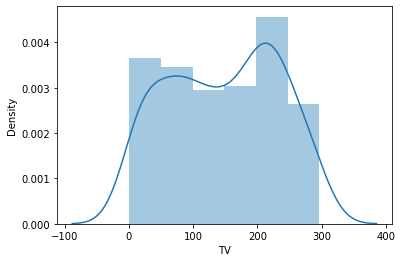

In [23]:
sn.distplot(df['TV'])

This is not normalized plot.

<AxesSubplot:xlabel='radio', ylabel='Density'>

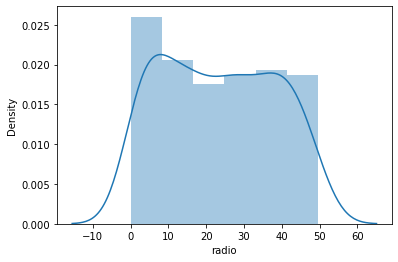

In [24]:
sn.distplot(df['radio'])

This is not normalized plot.

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

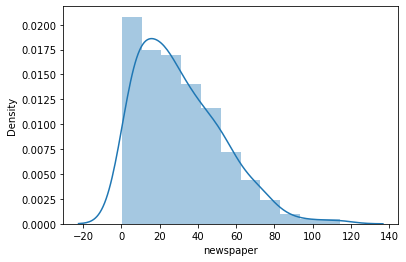

In [25]:
sn.distplot(df['newspaper'])

This is not normalized plot.

In [45]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


There are much difference between 75th and max values in TV and newspaper.

In [27]:
cor=df.corr()
cor

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


The sales have +ve corelation with TV,radio and Newspaper.
corelation between TV and sales are maxmimum.
corelation between radio and sales are medium.
corelation between newspaper and sales are minimum.


<AxesSubplot:>

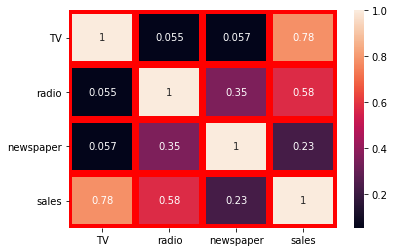

In [28]:
sn.heatmap(cor,annot=True,linewidths=6,linecolor='r')

In [29]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

There is small skewness in newspaper.

TV              AxesSubplot(0.125,0.536818;0.0945122x0.343182)
radio        AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
newspaper    AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
sales        AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
dtype: object

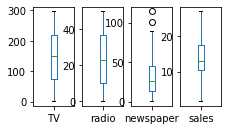

In [31]:
df.plot(kind='box',subplots=True,layout=(2,7))

Outliers present only in Newspaper dataset.

In [34]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

Outliers are present in newspaper only.
TV, radio and sales has no outlier.

In [35]:
df_new=df[(z<3).all(axis=1)]

In [36]:
df.shape

(200, 4)

In [37]:
df_new.shape

(198, 4)

In [39]:
data_loss=((200-198)/200)*100
data_loss

1.0

Only get 1% dataloss its less then 10% means we can proceed it.

In [40]:
x=df.drop(['sales'],axis=1)
y=df['sales']

x is independent variable and y is dependent.
x has TV, radio nad newspaper data.
y has sales data.

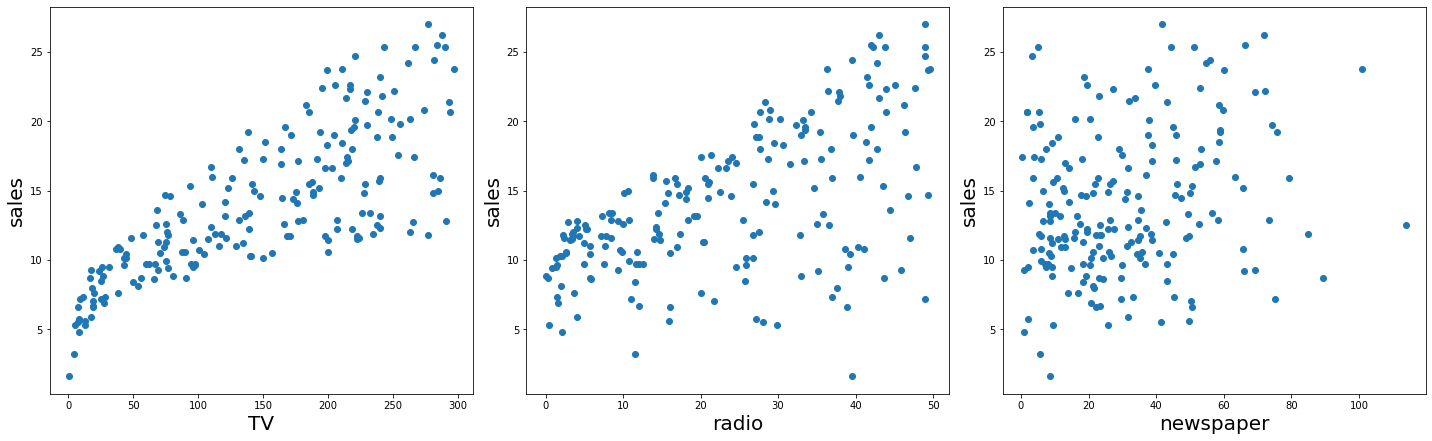

In [48]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('sales',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Positive relationship between feature variables and target variable.
if features variables are increases target varible is also increases.

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [80]:
x_scaled

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [52]:
y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 160, dtype: float64

In [73]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [74]:
lr.fit(x_train,y_train)

LinearRegression()

In [78]:
pred_test=lr.predict(x_test)

In [79]:
from sklearn.metrics import r2_score
r2_score(y_test,pred_test)

0.8994380241009119

# Regularization

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [85]:
from sklearn.linear_model import Lasso

parameters ={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [87]:
ls = Lasso(alpha=0.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

lss = r2_score(y_test,pred_ls)
lss

0.8982753162349368

we are getting same accuracy.

In [88]:
cv_score = cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.8872455897997933

# Ensemble Technique

In [89]:
from sklearn.ensemble import RandomForestRegressor

parameters ={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf= RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [92]:
rf=RandomForestRegressor(criterion='mse',max_features='auto')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:' ,rfs*100)

rfscore = cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 98.22573380130392
Cross Val Score: 97.45897612816755


In [95]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state =0, max_depth =5)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [96]:
dt.score(x_train,y_train)

0.9851290275048047

In [97]:
predictions = dt.predict(x_test)

In [99]:
dtscore = cross_val_score(dt,x,y,cv=5)
dtc=dtscore.mean()
print('Cross Val Score:',dtc*100)

Cross Val Score: 93.17601132908042


We will take difference of cross_val_score and accuracy as per the least difference decide the model.Least difference get from RandomForest or Lasso. best model is RandomForest or Lasso.

In [100]:
import pickle
filename ='Advertise.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion

In [104]:
loaded_model = pickle.load(open('Advertise.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9822573380130392


The Accuracy is very good.

In [103]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
Predicted,17.8,21.543,20.646,6.791,23.16,13.365,22.495,9.661,11.841,15.46,...,11.584,11.005,21.906,8.357,15.291,20.489,11.864,20.648,12.369,7.578
Original,17.8,21.543,20.646,6.791,23.16,13.365,22.495,9.661,11.841,15.46,...,11.584,11.005,21.906,8.357,15.291,20.489,11.864,20.648,12.369,7.578


We are getting almost same result Predicted as well as Original.RadomForest is the best algorithm